This is a trial notebook which is introducing the eurostat python package, source: https://pypi.org/project/eurostat/.
At first import packages as always.

In [1]:
import eurostat

The first step is to read the Eurostat table of contents into a dataframe by ```get_toc_df()``` function. It retrieves the titles, codes and timestamps of all Eurostat datasets.

## Browsing through Eurostat

In [2]:
toc_df = eurostat.get_toc_df()
toc_df

,title,code,type,last update of data,last table structure change,data start,data end
0,Gross weight of goods transported to/from main...,MAR_GO_AM_SE,dataset,2010-02-26T23:00:00+0100,2023-07-27T23:00:00+0200,1997,2022
1,Gross weight of goods transported to/from main...,MAR_GO_AM_SI,dataset,2023-08-24T23:00:00+0200,2023-08-24T23:00:00+0200,2001,2022
2,Gross weight of goods transported to/from main...,MAR_GO_AM_TR,dataset,2011-04-11T23:00:00+0200,2023-07-27T23:00:00+0200,2008,2022
3,Gross weight of goods transported to/from main...,MAR_GO_AM_UK,dataset,2010-04-22T11:00:00+0200,2023-11-22T11:00:00+0100,2000,2019
4,Gross weight of goods transported to/from main...,MAR_GO_QM,dataset,2024-03-05T23:00:00+0100,2024-03-05T23:00:00+0100,1997-Q1,2023-Q4
...,...,...,...,...,...,...,...
7644,Percentage of letters delivered on-time (USP u...,POST_CUBE1_X$POST_QOS_1,dataset,2024-03-14T12:09:14Z,2024-03-14T12:09:14Z,None,None
7645,Postal services,POST_CUBE1_X,dataset,2024-03-14T12:05:33Z,2024-03-14T12:05:33Z,2012,2022
7646,Number of enterprises providing postal services,POST_CUBE1_X$NUM701,dataset,2024-03-14T12:09:14Z,2024-03-14T12:09:14Z,None,None
7647,Access points (USP under direct or indirect d...,POST_CUBE1_X$POST_ACC_1,dataset,2024-03-14T12:09:14Z,2024-03-14T12:09:14Z,None,None


You can filter the datasets by *keyword*. Function ```subset_toc_df()``` extracts the datasets where the title contains *keyword*. Let's pick a keyword, for example ```'science'```.

In [13]:
sc_datasets = eurostat.subset_toc_df(toc_df, 'science')
sc_datasets

,title,code,type,last update of data,last table structure change,data start,data end
2401,Human resources in science and technology (HRST),TSC00025,dataset,2024-03-14T23:00:00+0100,2024-03-14T23:00:00+0100,2011,2022
4145,Human resources in science and technology (HRS...,TGS00038,dataset,2024-03-15T23:00:00+0100,2024-03-15T23:00:00+0100,2011,2022
5159,"Low achieving 15-year-olds in reading, mathema...",SDG_04_40,dataset,2024-01-03T23:00:00+0100,2024-01-03T23:00:00+0100,2000,2022
5265,"Low achieving 15-year-olds in reading, mathema...",EDUC_OUTC_PISA,dataset,2023-12-14T11:00:00+0100,2024-01-03T23:00:00+0100,2000,2022
5476,"Graduates in tertiary education, in science, m...",EDUC_UOE_GRAD04,dataset,2024-01-26T11:00:00+0100,2024-01-03T23:00:00+0100,2012,2021
5484,"Graduates at doctoral level, in science, math....",EDUC_UOE_GRAD07,dataset,2023-12-12T11:00:00+0100,2024-01-03T23:00:00+0100,2013,2021


Unfortunately, titles are a bit longer so they are not fully visible. Create a dictionary from the ```sc_datasets``` dataframe that contains only the title and the code. You can use the [**DataFrame.to_dict**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_dict.html) function.

In [14]:
sc_datasets1 = sc_datasets.loc[:, ('title', 'code')]
dict_from_df = sc_datasets1.to_dict()
dict_from_df

{'title': {2401: 'Human resources in science and technology (HRST)',
  4145: 'Human resources in science and technology (HRST) by NUTS 2 regions',
  5159: 'Low achieving 15-year-olds in reading, mathematics or science',
  5265: 'Low achieving 15-year-olds in reading, mathematics or science by sex',
  5476: 'Graduates in tertiary education, in science, math., computing, engineering, manufacturing, construction, by sex - per 1000 of population aged 20-29',
  5484: 'Graduates at doctoral level, in science, math., computing, engineering, manufacturing, construction, by sex - per 1000 of population aged 25-34'},
 'code': {2401: 'TSC00025',
  4145: 'TGS00038',
  5159: 'SDG_04_40',
  5265: 'EDUC_OUTC_PISA',
  5476: 'EDUC_UOE_GRAD04',
  5484: 'EDUC_UOE_GRAD07'}}

Now you can see the science datasets titles in their full length. Let's choose the **```'Human resources in science and technology (HRST) by NUTS 2 regions'```** as the working dataset for this notebook.

Use ```get_data_df(code)``` function to read the dataset, specified by its code, into a dataframe.

In [16]:
code = sc_datasets1.loc[4145, 'code'] # toto musim este vyriesit, lebo zakazdym ma ten dataset iny index => mohlo by sa to vyriesit cez iloc?, ze daj mi index, na ktorom je dataset s title == "Human resources in ..." a potom daj mi code na tom indexe
data = eurostat.get_data_df(code)
data

,freq,category,unit,geo\TIME_PERIOD,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,A,HRST,PC_ACT,AT11,35.8,34.9,37.4,43.5,45.3,45.1,47.2,46.4,48.6,51.4,49.9,50.5
1,A,HRST,PC_ACT,AT12,37.5,37.9,39.2,46.1,47.3,47.1,49.2,49.5,49.1,51.0,52.0,51.2
2,A,HRST,PC_ACT,AT13,46.5,47.4,50.5,56.6,56.1,55.9,56.9,55.5,56.6,57.2,57.9,60.1
3,A,HRST,PC_ACT,AT21,35.9,36.5,37.7,44.2,43.9,45.5,45.3,47.7,47.0,49.1,50.0,49.1
4,A,HRST,PC_ACT,AT22,35.4,36.8,36.2,41.5,43.1,43.7,44.4,45.3,46.0,46.9,46.7,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,A,HRST,PC_ACT,UKM6,45.2,47.6,51.0,48.5,49.0,50.2,52.9,49.8,53.0,NaN,NaN,NaN
337,A,HRST,PC_ACT,UKM7,NaN,NaN,56.5,56.3,57.5,59.3,60.4,59.2,61.4,NaN,NaN,NaN
338,A,HRST,PC_ACT,UKM8,NaN,NaN,52.0,53.0,55.7,58.3,57.0,56.9,60.4,NaN,NaN,NaN
339,A,HRST,PC_ACT,UKM9,NaN,NaN,47.7,49.4,48.9,52.4,52.5,52.1,54.5,NaN,NaN,NaN


Get the column names by ```get_pars(code)``` function and save them in a list ```columns```.

In [17]:
columns = eurostat.get_pars(code)
columns

['freq', 'category', 'unit', 'geo']

Maybe you know what these abbreviations stand for, but it's not 100% clear. Get the full names and meanings of these columns using ```get_dic(code)``` function.

In [18]:
columns_meanings = eurostat.get_dic(code)
columns_meanings

[('freq',
  'Time frequency',
  'This code list contains the periodicity that refers to the frequency.'),
 ('category', 'Category', None),
 ('unit', 'Unit of measure', None),
 ('geo',
  'Geopolitical entity (reporting)',
  'This code list defines the reporting geopolitical entities.')]

Now get the values and their meanings of the first 3 columns (```'freq'```, ```'category'```, ```'unit'```) using the same ```get_dic()``` function. You have to provide more parameters in order to get that, so let's break it down:
- ```code```: variable ```code``` that specifies the dataset
- ```par```: for which column you want to get the values and their meanings
- ```full```: boolean parameter that determins whether you want values only in this dataset (```False```) or the list of all possible values (```True```) 
- ```frmt```: format in which you want to get it, there are 3 options = dictionary (```"dict"```), dataframe (```"df"```), list (```"list"```)

In [19]:
column_dict = []
for column in columns[:3]:
    column_dict.append(eurostat.get_dic(code, par=column, full=False, frmt="dict"))
column_dict

[{'A': 'Annual'},
 {'HRST': 'Persons with tertiary education (ISCED) and/or employed in science and technology'},
 {'PC_ACT': 'Percentage of population in the labour force'}]

Save the ```Geopolitical entity``` values and their meanings into a separat dictionary named ```nuts2_dict```.

In [20]:
nuts2_dict = eurostat.get_dic(code, par=columns[3], full=False, frmt="dict")
print(len(nuts2_dict))
nuts2_dict

345


{'EA20': 'Euro area – 20 countries (from 2023)',
 'BE10': 'Région de Bruxelles-Capitale/Brussels Hoofdstedelijk Gewest',
 'BE21': 'Prov. Antwerpen',
 'BE22': 'Prov. Limburg (BE)',
 'BE23': 'Prov. Oost-Vlaanderen',
 'BE24': 'Prov. Vlaams-Brabant',
 'BE25': 'Prov. West-Vlaanderen',
 'BE31': 'Prov. Brabant wallon',
 'BE32': 'Prov. Hainaut',
 'BE33': 'Prov. Liège',
 'BE34': 'Prov. Luxembourg (BE)',
 'BE35': 'Prov. Namur',
 'BG31': 'Severozapaden',
 'BG32': 'Severen tsentralen',
 'BG33': 'Severoiztochen',
 'BG34': 'Yugoiztochen',
 'BG41': 'Yugozapaden',
 'BG42': 'Yuzhen tsentralen',
 'CZ01': 'Praha',
 'CZ02': 'Střední Čechy',
 'CZ03': 'Jihozápad',
 'CZ04': 'Severozápad',
 'CZ05': 'Severovýchod',
 'CZ06': 'Jihovýchod',
 'CZ07': 'Střední Morava',
 'CZ08': 'Moravskoslezsko',
 'DK01': 'Hovedstaden',
 'DK02': 'Sjælland',
 'DK03': 'Syddanmark',
 'DK04': 'Midtjylland',
 'DK05': 'Nordjylland',
 'DE11': 'Stuttgart',
 'DE12': 'Karlsruhe',
 'DE13': 'Freiburg',
 'DE14': 'Tübingen',
 'DE21': 'Oberbayern

In [31]:
at_nuts2 = []
for code, full_name in nuts2_dict.items():
    if 'AT' in code:
        print(f"{code}: {full_name}")

print(at_nuts2)

AT11: Burgenland
AT12: Niederösterreich
AT13: Wien
AT21: Kärnten
AT22: Steiermark
AT31: Oberösterreich
AT32: Salzburg
AT33: Tirol
AT34: Vorarlberg
['Burgenland', 'Niederösterreich', 'Wien', 'Kärnten', 'Steiermark', 'Oberösterreich', 'Salzburg Bundesland', 'Tirol', 'Vorarlberg']


## Plot

In [ ]:
import matplotlib.pyplot as plt

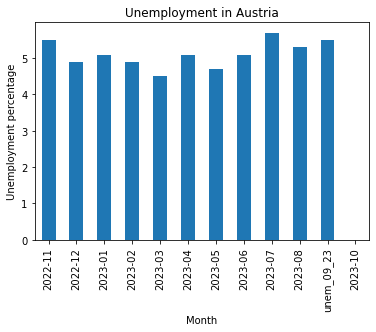

In [28]:
d = data.loc[:, ('Monthly',
                'Seasonally adjusted data, not calendar adjusted data',
                'Total',
                'Total',
                'Percentage of population in the labour force')]
ax = d['Austria'].plot.bar()
ax.set_title('Unemployment in Austria') 
ax.set_xlabel('Month') 
_ = ax.set_ylabel('Unemployment percentage') 

## EU countries GeoDataFrame download shp

Download of NUTS shapefile using package requests.

In [26]:
import requests
import os
import zipfile
import geopandas

In [41]:
# URL of the nuts2 geojson to download
url = "https://gisco-services.ec.europa.eu/distribution/v2/nuts/geojson/NUTS_RG_01M_2021_4326_LEVL_2.geojson"

# file name and path for saving the downloaded geojson
file_name = "NUTS_RG_01M_2021_4326_LEVL_2.geojson"
file_path = os.path.join("D:/ArcGIS_Notebooks_thesis/eurostat/", file_name)

In [42]:
# Send a GET request to the URL to download the file
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Write the content to a file
    with open(file_path, 'wb') as f:
        f.write(response.content)
    print(f"File '{file_name}' downloaded successfully!")
else:
    print("Failed to download the file.")

File 'NUTS_RG_01M_2021_4326_LEVL_2.geojson' downloaded successfully!


In [91]:
gdf_from_geojson = geopandas.read_file(file_path)
gdf_from_geojson.head()

,id,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry
0,DE12,DE12,2,DE,Karlsruhe,Karlsruhe,0.0,0,0,DE12,"MULTIPOLYGON (((9.60382 49.42658, 9.57113 49.4..."
1,CH05,CH05,2,CH,Ostschweiz,Ostschweiz,0.0,0,0,CH05,"MULTIPOLYGON (((8.61383 47.80108, 8.62155 47.7..."
2,CZ02,CZ02,2,CZ,Střední Čechy,Střední Čechy,0.0,0,0,CZ02,"MULTIPOLYGON (((15.14677 50.52294, 15.14161 50..."
3,CH01,CH01,2,CH,Région lémanique,Région lémanique,0.0,0,0,CH01,"MULTIPOLYGON (((6.78005 46.85264, 6.74231 46.8..."
4,BE24,BE24,2,BE,Prov. Vlaams-Brabant,Prov. Vlaams-Brabant,0.0,0,0,BE24,"POLYGON ((5.10348 50.70906, 5.09468 50.70367, ..."


In [95]:
id_list = gdf_from_geojson['id'].tolist()
nuts_id_list = gdf_from_geojson['NUTS_ID'].tolist()
fid_list = gdf_from_geojson['FID'].tolist()

if id_list == nuts_id_list == fid_list:
    print("IDs in all three columns 'id', 'NUTS_ID' and 'FID' are identical")
else:
    print("IDs are not identical")

IDs in all three columns 'id', 'NUTS_ID' and 'FID' are identical


In [96]:
name_latn_list = gdf_from_geojson['NAME_LATN'].tolist()
nuts_name_list = gdf_from_geojson['NUTS_NAME'].tolist()

if name_latn_list == nuts_name_list:
    print("names in the columns 'NAME_LATN' and 'NUTS_NAME' are identical")
else:
    print("names in the columns 'NAME_LATN' and 'NUTS_NAME' are not identical")

names in the columns 'NAME_LATN' and 'NUTS_NAME' are not identical


In [97]:
gdf_from_geojson = gdf_from_geojson.loc[:, ('NUTS_ID', 'CNTR_CODE', 'NAME_LATN', 'NUTS_NAME', 'geometry')]
gdf_from_geojson

,NUTS_ID,CNTR_CODE,NAME_LATN,NUTS_NAME,geometry
0,DE12,DE,Karlsruhe,Karlsruhe,"MULTIPOLYGON (((9.60382 49.42658, 9.57113 49.4..."
1,CH05,CH,Ostschweiz,Ostschweiz,"MULTIPOLYGON (((8.61383 47.80108, 8.62155 47.7..."
2,CZ02,CZ,Střední Čechy,Střední Čechy,"MULTIPOLYGON (((15.14677 50.52294, 15.14161 50..."
3,CH01,CH,Région lémanique,Région lémanique,"MULTIPOLYGON (((6.78005 46.85264, 6.74231 46.8..."
4,BE24,BE,Prov. Vlaams-Brabant,Prov. Vlaams-Brabant,"POLYGON ((5.10348 50.70906, 5.09468 50.70367, ..."
...,...,...,...,...,...
329,NO0A,NO,Vestlandet,Vestlandet,"MULTIPOLYGON (((9.06206 62.37261, 9.01855 62.3..."
330,TR51,TR,Ankara,Ankara,"POLYGON ((33.46440 38.63659, 33.45947 38.64448..."
331,TR52,TR,"Konya, Karaman","Konya, Karaman","POLYGON ((33.46440 38.63659, 33.36248 38.56250..."
332,HR05,HR,Grad Zagreb,Grad Zagreb,"POLYGON ((16.15481 45.96877, 16.15674 45.96095..."


334


<AxesSubplot:>

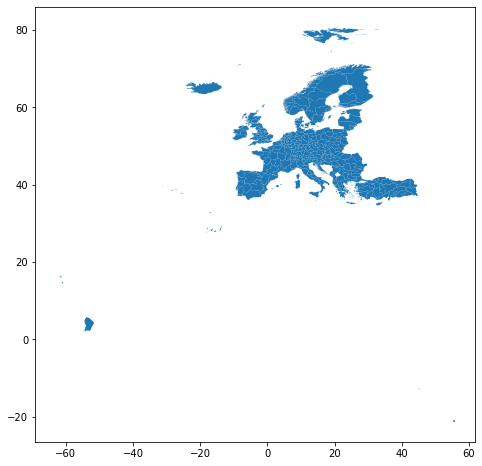

In [107]:
print(len(gdf_from_geojson))
gdf_from_geojson.plot(figsize=(8, 8))

325


<AxesSubplot:>

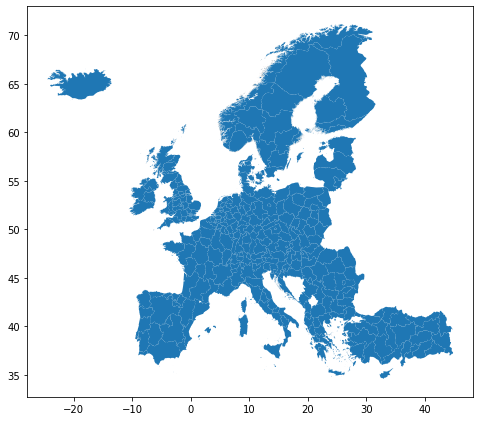

In [114]:
nuts2_gdf = gdf_from_geojson.cx[-15:, 34:70]
print(len(nuts2_gdf))
nuts2_gdf.plot(figsize=(8, 8))

<AxesSubplot:>

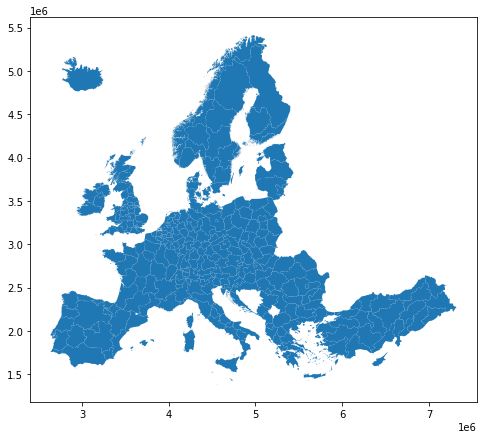

In [116]:
nuts2_gdf = nuts2_gdf.to_crs("EPSG:3035")
nuts2_gdf.plot(figsize=(8, 8))
#© EuroGeographics for the administrative boundaries

In [110]:
data.rename(columns = {'geo\TIME_PERIOD':'NUTS_ID'}, inplace = True)
data.head()

,freq,category,unit,NUTS_ID,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,A,HRST,PC_ACT,AT11,35.8,34.9,37.4,43.5,45.3,45.1,47.2,46.4,48.6,51.4,49.9,50.5
1,A,HRST,PC_ACT,AT12,37.5,37.9,39.2,46.1,47.3,47.1,49.2,49.5,49.1,51.0,52.0,51.2
2,A,HRST,PC_ACT,AT13,46.5,47.4,50.5,56.6,56.1,55.9,56.9,55.5,56.6,57.2,57.9,60.1
3,A,HRST,PC_ACT,AT21,35.9,36.5,37.7,44.2,43.9,45.5,45.3,47.7,47.0,49.1,50.0,49.1
4,A,HRST,PC_ACT,AT22,35.4,36.8,36.2,41.5,43.1,43.7,44.4,45.3,46.0,46.9,46.7,49.0


In [117]:
nuts2_gdf_hrst = nuts2_gdf.merge(data, on='NUTS_ID')
nuts2_gdf_hrst.head()

,NUTS_ID,CNTR_CODE,NAME_LATN,NUTS_NAME,geometry,freq,category,unit,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,DE12,DE,Karlsruhe,Karlsruhe,"MULTIPOLYGON (((4292253.705 2923819.973, 42898...",A,HRST,PC_ACT,45.7,46.8,47.1,47.3,48.3,48.5,48.7,48.4,50.5,50.7,51.4,52.2
1,CH05,CH,Ostschweiz,Ostschweiz,"MULTIPOLYGON (((4217105.198 2744025.879, 42176...",A,HRST,PC_ACT,42.0,42.2,44.2,45.3,45.9,47.6,48.3,49.7,51.6,52.0,51.4,50.4
2,CZ02,CZ,Střední Čechy,Střední Čechy,"MULTIPOLYGON (((4685657.738 3058491.488, 46853...",A,HRST,PC_ACT,34.4,36.7,36.6,37.3,37.1,36.6,38.0,40.0,39.1,39.2,40.0,39.6
3,CH01,CH,Région lémanique,Région lémanique,"MULTIPOLYGON (((4075295.021 2643018.666, 40722...",A,HRST,PC_ACT,49.5,50.2,50.3,51.0,51.2,52.8,54.7,55.2,55.9,55.7,54.8,54.4
4,BE24,BE,Prov. Vlaams-Brabant,Prov. Vlaams-Brabant,"POLYGON ((3975414.370 3077940.643, 3974754.391...",A,HRST,PC_ACT,55.2,56.1,54.8,56.6,56.3,58.3,61.9,59.1,60.6,63.1,65.1,62.7


321


<AxesSubplot:>

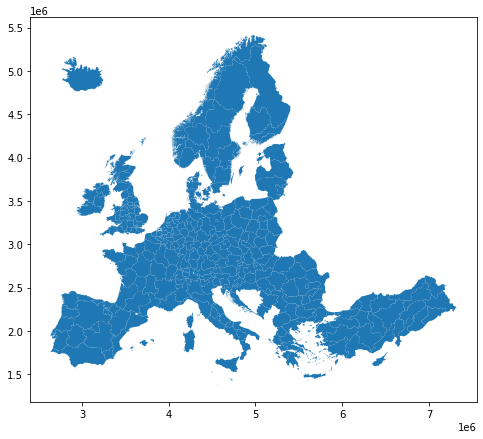

In [118]:
print(len(nuts2_gdf_hrst))
nuts2_gdf_hrst.plot(figsize=(8, 8))

In [123]:
nuts2_gdf_id_list = nuts2_gdf['NUTS_ID'].tolist()
nuts2_gdf_hrst_id_list = nuts2_gdf_hrst['NUTS_ID'].tolist()

difference = []
for id in nuts2_gdf_id_list:
    if id not in nuts2_gdf_hrst_id_list:
        difference.append(id)

difference

['AL01', 'AL02', 'AL03', 'LI00']

In [132]:
for id in difference:    
    print(nuts2_gdf[nuts2_gdf.NUTS_ID == id])
    #nuts2_gdf[nuts2_gdf.NUTS_ID == id]

   NUTS_ID CNTR_CODE NAME_LATN NUTS_NAME  \
15    AL01        AL      Veri      Veri   

                                             geometry  
15  POLYGON ((5129579.218 2204098.703, 5129899.812...  
   NUTS_ID CNTR_CODE NAME_LATN NUTS_NAME  \
35    AL02        AL    Qender    Qender   

                                             geometry  
35  POLYGON ((5178239.016 2085653.856, 5180303.196...  
   NUTS_ID CNTR_CODE NAME_LATN NUTS_NAME  \
36    AL03        AL       Jug       Jug   

                                             geometry  
36  MULTIPOLYGON (((5211962.703 2061668.486, 52149...  
    NUTS_ID CNTR_CODE      NAME_LATN      NUTS_NAME  \
252    LI00        LI  Liechtenstein  Liechtenstein   

                                              geometry  
252  POLYGON ((4292201.681 2670971.921, 4292532.342...  


In [133]:
nuts2_gdf.loc[difference, :]

KeyError: "None of [Index(['AL01', 'AL02', 'AL03', 'LI00'], dtype='object')] are in the [index]"